In [1]:
import os
import logging
import pickle
import pandas as pd
import spacy
from spacy.vectors import Vectors
from spacy.strings import StringStore
from nltk.corpus import stopwords

import gensim
from gensim import corpora, models, similarities
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
os.getcwd()

'/home/ryohayama/Python/b13logy/nlp'

In [3]:
dictionary = corpora.Dictionary.load('nlp09_data//nlp09_lemmatized_corpus.dict')
corpus = corpora.MmCorpus('nlp09_data/nlp09_bow_corpus.mm')

In [4]:
# Set up a tf-idf transforming model using the corpus
tfidf_model = models.TfidfModel(corpus)

In [5]:
# Transform corpus into tf-idf space
corpus_tfidf = tfidf_model[corpus]

print(tfidf_model)
print(corpus)
print(len(corpus_tfidf))

TfidfModel(num_docs=13434, num_nnz=1270334)
MmCorpus(13434 documents, 27077 features, 1270334 non-zero entries)
13434


In [6]:
# Use 10 topic LDA model
lda = models.LdaModel.load('nlp10_data/nlp10_tfidf_10.lda')

In [7]:
corpus_lda = lda[corpus_tfidf]
print(len(corpus_lda))

13434


In [8]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [9]:
%%time
pyLDAvis.gensim.prepare(lda, corpus_tfidf, dictionary)

CPU times: user 7.32 s, sys: 106 ms, total: 7.43 s
Wall time: 8.29 s


/home/ryohayama/.local/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.191981 -0.075542       1        1  50.362213
9     -0.204897  0.077908       2        1  25.632992
6      0.005352 -0.018383       3        1   4.485568
5     -0.011400  0.014701       4        1   4.078353
0      0.052627 -0.123250       5        1   3.697116
3      0.052085  0.040925       6        1   2.787796
2      0.086230  0.011232       7        1   2.541628
1      0.072082  0.010173       8        1   2.148169
8      0.073598  0.034651       9        1   2.133934
7      0.066304  0.027585      10        1   2.132233, topic_info=      Category        Freq          Term       Total  loglift  logprob
term                                                                  
291    Default  261.000000          cell  261.000000  30.0000  30.0000
12417  Default   87.000000          role   87.000000  29.0000  29.0000
9196   Default   32.000000    understand   32.000000  28.0000  28.0000
5181   Default   76.000000    regulation   76.000000  27.0000  27.0000
7876   Default   70.000000       project   70.000000  26.0000  26.0000
2502   Default   85.000000        stress   85.000000  25.0000  25.0000
2038   Default  120.000000      maxquant  120.000000  24.0000  24.0000
794    Default   72.000000        reveal   72.000000  23.0000  23.0000
700    Default   87.000000       involve   87.000000  22.0000  22.0000
52     Default  124.000000       complex  124.000000  21.0000  21.0000
2149   Default   49.000000          host   49.000000  20.0000  20.0000
9739   Default   39.000000    resistance   39.000000  19.0000  19.0000
583    Default   67.000000        effect   67.000000  18.0000  18.0000
1312   Default   71.000000    metabolism   71.000000  17.0000  17.0000
6626   Default   77.000000     mechanism   77.000000  16.0000  16.0000
9312   Default   33.000000      scaffold   33.000000  15.0000  15.0000
143    Default   50.000000         scale   50.000000  14.0000  14.0000
2008   Default   95.000000     oxidation   95.000000  13.0000  13.0000
1302   Default   84.000000          show   84.000000  12.0000  12.0000
1298   Default  213.000000        search  213.000000  11.0000  11.0000
111    Default  203.000000            ms  203.000000  10.0000  10.0000
3609   Default  129.000000       pathway  129.000000   9.0000   9.0000
135    Default   31.000000      receptor   31.000000   8.0000   8.0000
1263   Default  156.000000      database  156.000000   7.0000   7.0000
13635  Default   22.000000     community   22.000000   6.0000   6.0000
5556   Default   30.000000      pathogen   30.000000   5.0000   5.0000
3414   Default  137.000000      response  137.000000   4.0000   4.0000
9966   Default   42.000000          play   42.000000   3.0000   3.0000
1857   Default   21.000000           hla   21.000000   2.0000   2.0000
792    Default   61.000000         plant   61.000000   1.0000   1.0000
...        ...         ...           ...         ...      ...      ...
11777  Topic10    2.407428            em    2.987186   3.6322  -6.7631
4058   Topic10    2.440951         aebsf    3.060748   3.6217  -6.7492
17616  Topic10    2.349588        boncat    2.953993   3.6191  -6.7874
7181   Topic10    3.017630      cerebral    3.804847   3.6162  -6.5371
6789   Topic10    2.141577        fulfil    2.732524   3.6043  -6.8801
7942   Topic10    2.093193        smooth    2.676660   3.6021  -6.9029
4708   Topic10    2.014433          bulb    2.594107   3.5951  -6.9413
6937   Topic10    2.022470           cns    2.606525   3.5943  -6.9373
8722   Topic10    2.003217          bean    2.592482   3.5901  -6.9469
4165   Topic10    2.020481     tonoplast    2.625795   3.5860  -6.9383
6663   Topic10    1.850061       plastid    2.433006   3.5741  -7.0264
2727   Topic10    1.831731      donovani    2.409534   3.5738  -7.0364
5680   Topic10    1.877987          prim    2.470914   3.5736  -7.0114
3608   Topic10    1.805336           igm   

In [10]:
def lda2df(corpus_lda):
    corpus_lda2_dict = []
    for doc in corpus_lda:
        lda2dict = {}
        for topic in doc:
            lda2dict[topic[0]] = topic[1]
        corpus_lda2_dict.append(lda2dict)
    df = pd.DataFrame(corpus_lda2_dict)
    return df

In [11]:
%%time
df = lda2df(corpus_lda)

CPU times: user 5.5 s, sys: 7.07 ms, total: 5.51 s
Wall time: 5.52 s


In [12]:
df.head()

,0,1,2,3,4,5,6,7,8,9
0,NaN,NaN,NaN,0.060207,0.856262,NaN,0.023405,NaN,NaN,NaN
1,0.017904,0.017905,0.017903,0.354806,0.501950,0.017906,0.017905,0.017903,0.017908,0.017911
2,0.011323,0.033428,0.037708,0.011308,0.797622,0.011304,0.063416,0.011297,0.011296,0.011297
3,NaN,NaN,NaN,NaN,0.758603,0.143052,NaN,NaN,0.036001,0.020206
4,NaN,NaN,NaN,NaN,0.934974,NaN,NaN,NaN,NaN,NaN


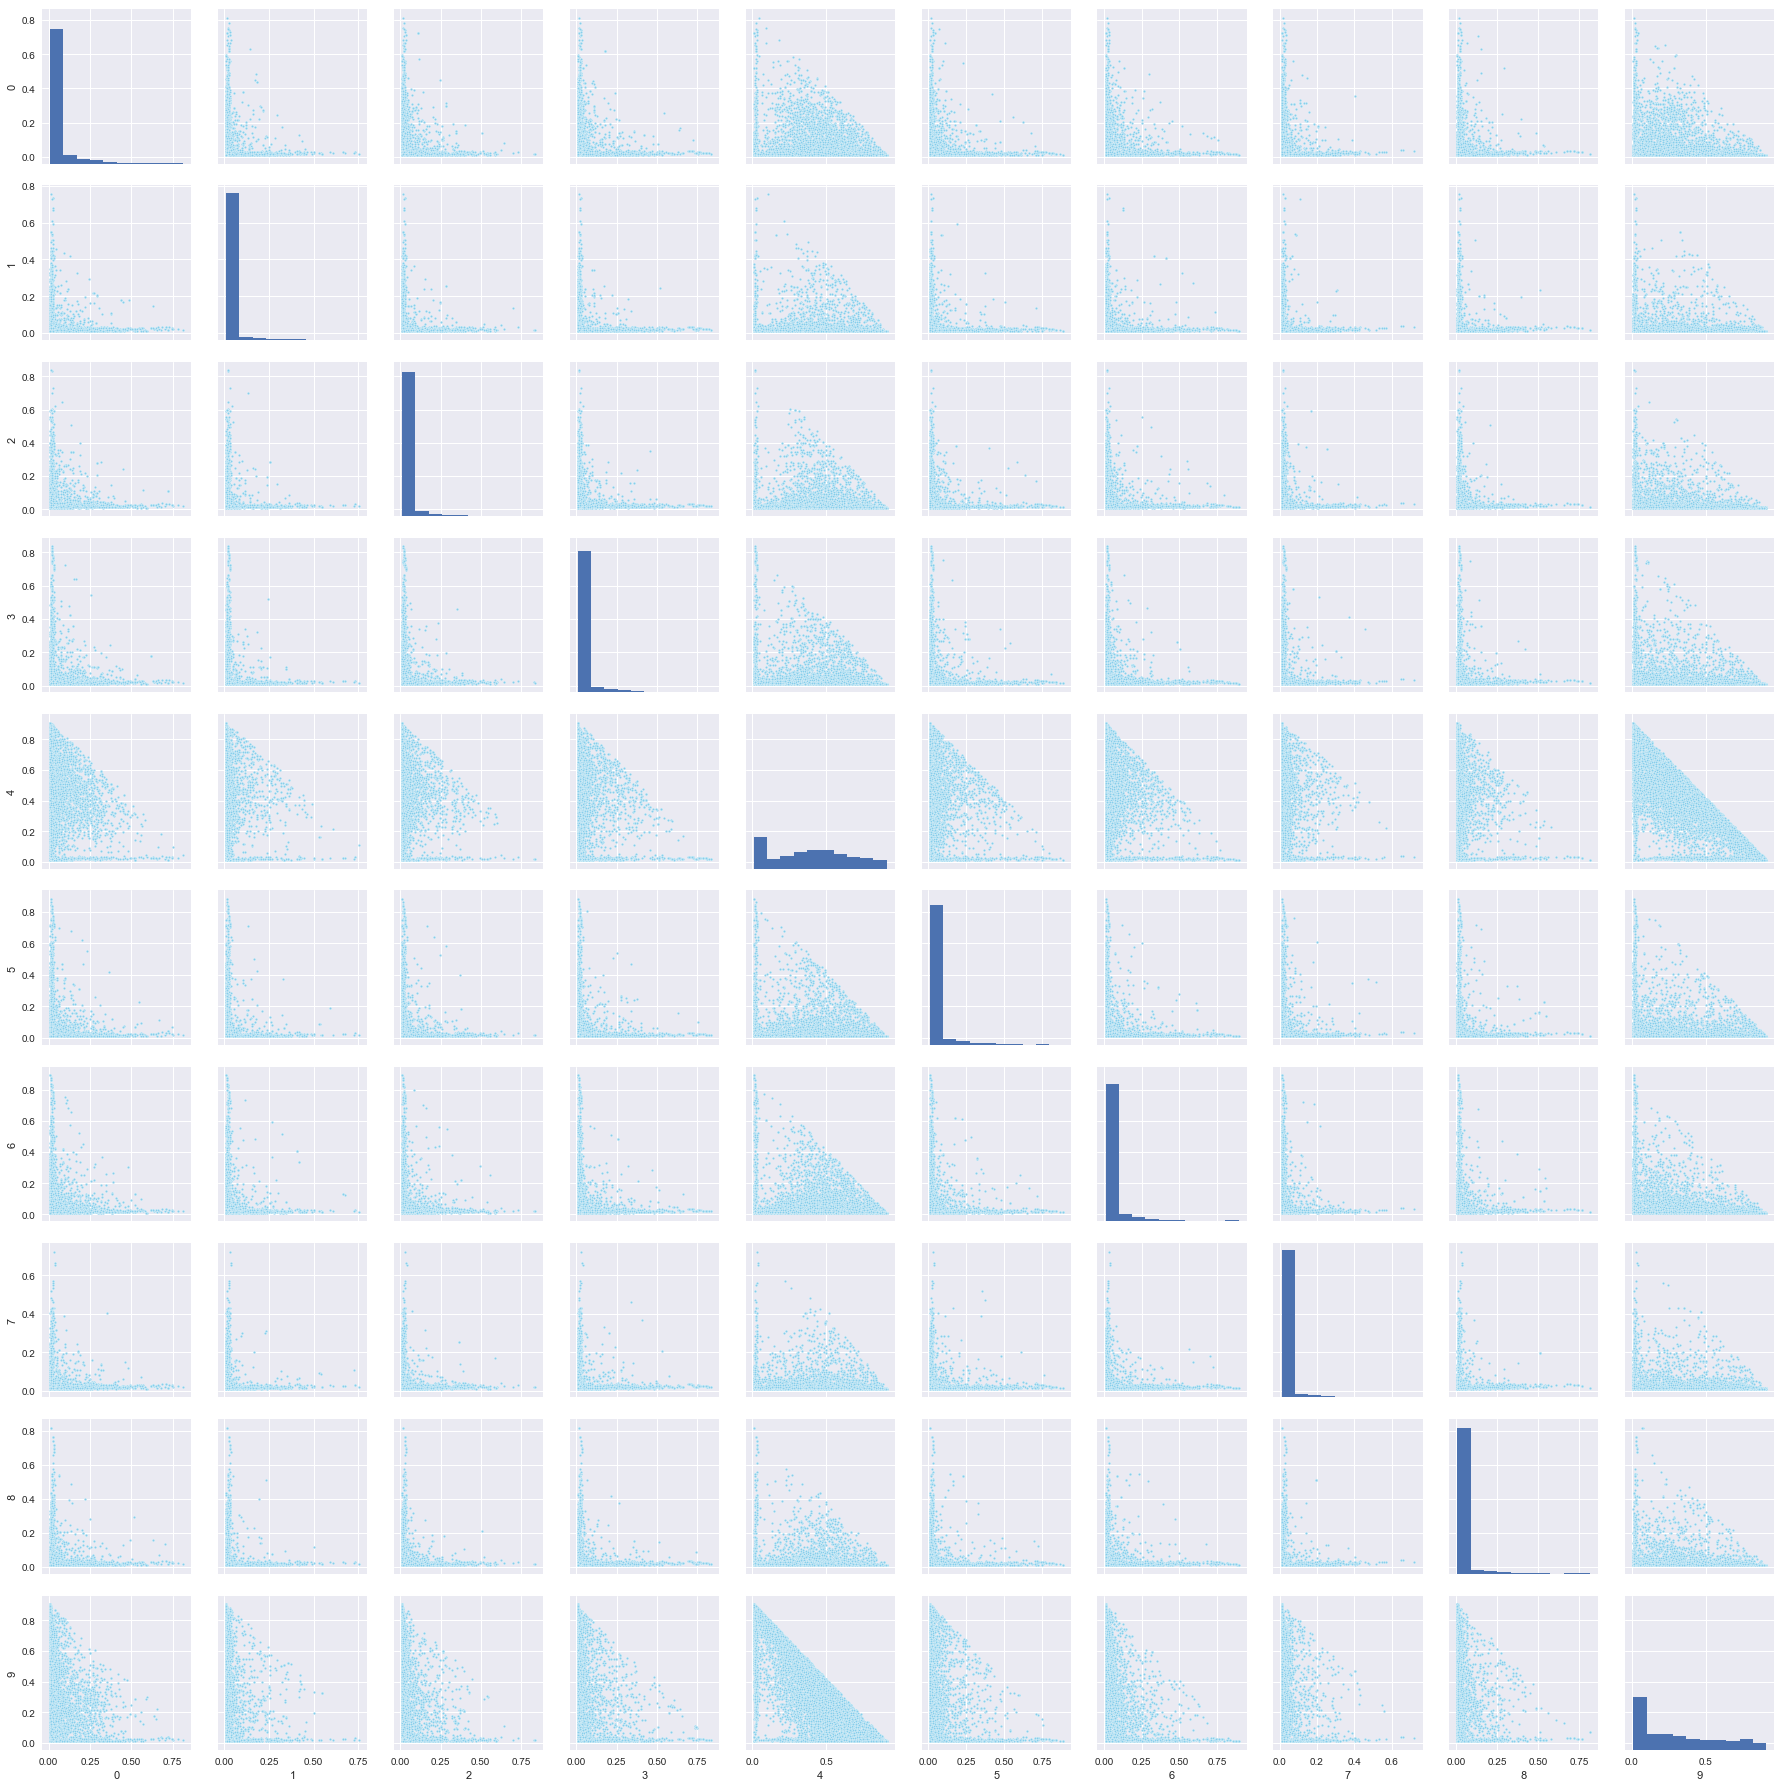

In [13]:
sns.set(style="darkgrid")
sns.pairplot(df.dropna(), plot_kws={'s': 7, 'color':'skyblue'})

In [14]:
X = np.array(df.dropna())
pca = PCA()
Xpca = pca.fit_transform(X)

In [15]:
X.shape, Xpca.shape

((10047, 10), (10047, 10))

Text(0,0.5,'Component 3')

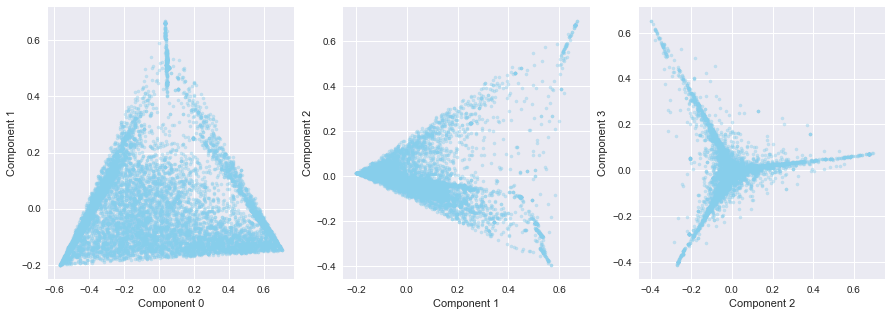

In [16]:
color = 'skyblue'
alpha=0.4
s=10
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].scatter(Xpca[:, 0], Xpca[:, 1], s=s, color=color, alpha=alpha)
axes[0].set_xlabel('Component 0')
axes[0].set_ylabel('Component 1')

axes[1].scatter(Xpca[:, 1], Xpca[:, 2], s=s, color=color, alpha=alpha)
axes[1].set_xlabel('Component 1')
axes[1].set_ylabel('Component 2')

axes[2].scatter(Xpca[:, 2], Xpca[:, 3], s=s, color=color, alpha=alpha)
axes[2].set_xlabel('Component 2')
axes[2].set_ylabel('Component 3')